<a href="https://colab.research.google.com/github/Wellitsabhi/AI-project/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
warnings.filterwarnings('ignore')


In [16]:
df1 = pd.read_csv('/content/drive/MyDrive/mental fitness/mental-disease.csv')
df2 = pd.read_csv('/content/drive/MyDrive/mental fitness/prevalence-by-mental-and-substance-use-disorder-AI.csv')

In [32]:
print(data.columns)

Index(['Country', 'Year', 'DALYs', 'Schizophrenia', 'Bipolar_disorder',
       'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol'],
      dtype='object')


In [33]:
print(data.head())

       Country  Year     DALYs  Schizophrenia  Bipolar_disorder  \
0  Afghanistan  1990  1.696670       0.228979          0.721207   
1  Afghanistan  1991  1.734281       0.228120          0.719952   
2  Afghanistan  1992  1.791189       0.227328          0.718418   
3  Afghanistan  1993  1.776779       0.226468          0.717452   
4  Afghanistan  1994  1.712986       0.225567          0.717012   

   Eating_disorder   Anxiety  drug_usage  depression   alcohol  
0         0.131001  4.835127    0.454202    5.125291  0.444036  
1         0.126395  4.821765    0.447112    5.116306  0.444250  
2         0.121832  4.801434    0.441190    5.106558  0.445501  
3         0.117942  4.789363    0.435581    5.100328  0.445958  
4         0.114547  4.784923    0.431822    5.099424  0.445779  


In [17]:
data = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])

In [21]:
if 'Code' in data.columns:
    data.drop('Code', axis=1, inplace=True)

data.set_axis(['Country', 'Year', 'DALYs', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety',
               'drug_usage', 'depression', 'alcohol'], axis='columns', inplace=True)

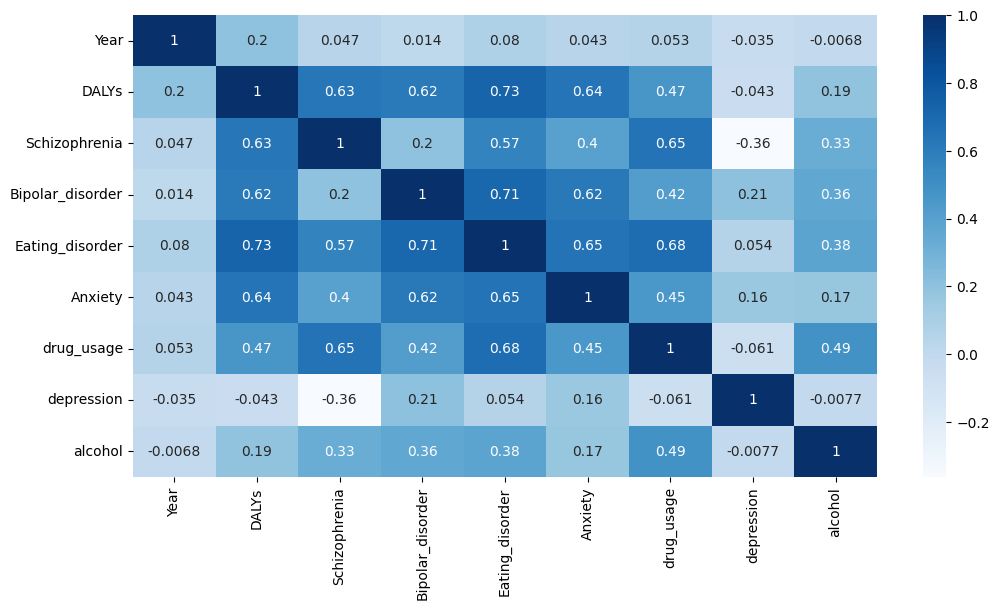

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

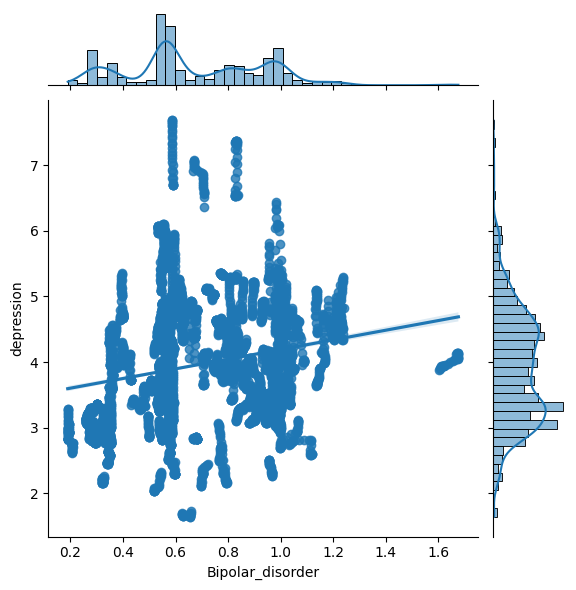

In [34]:
sns.jointplot(data=data, x='Bipolar_disorder', y='depression', kind='reg')
plt.show()

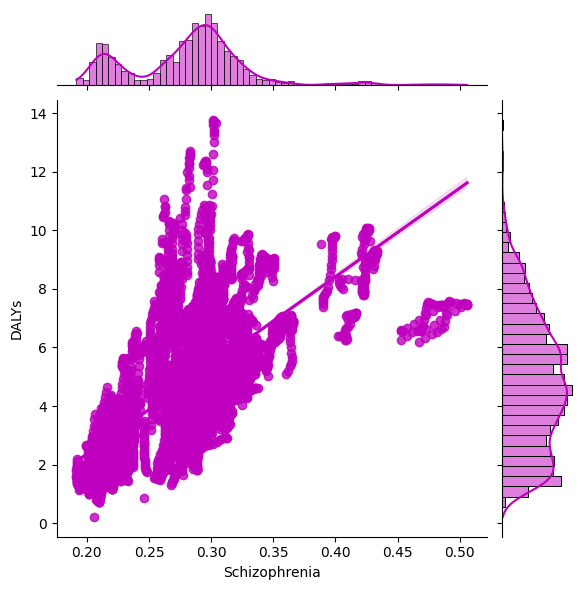

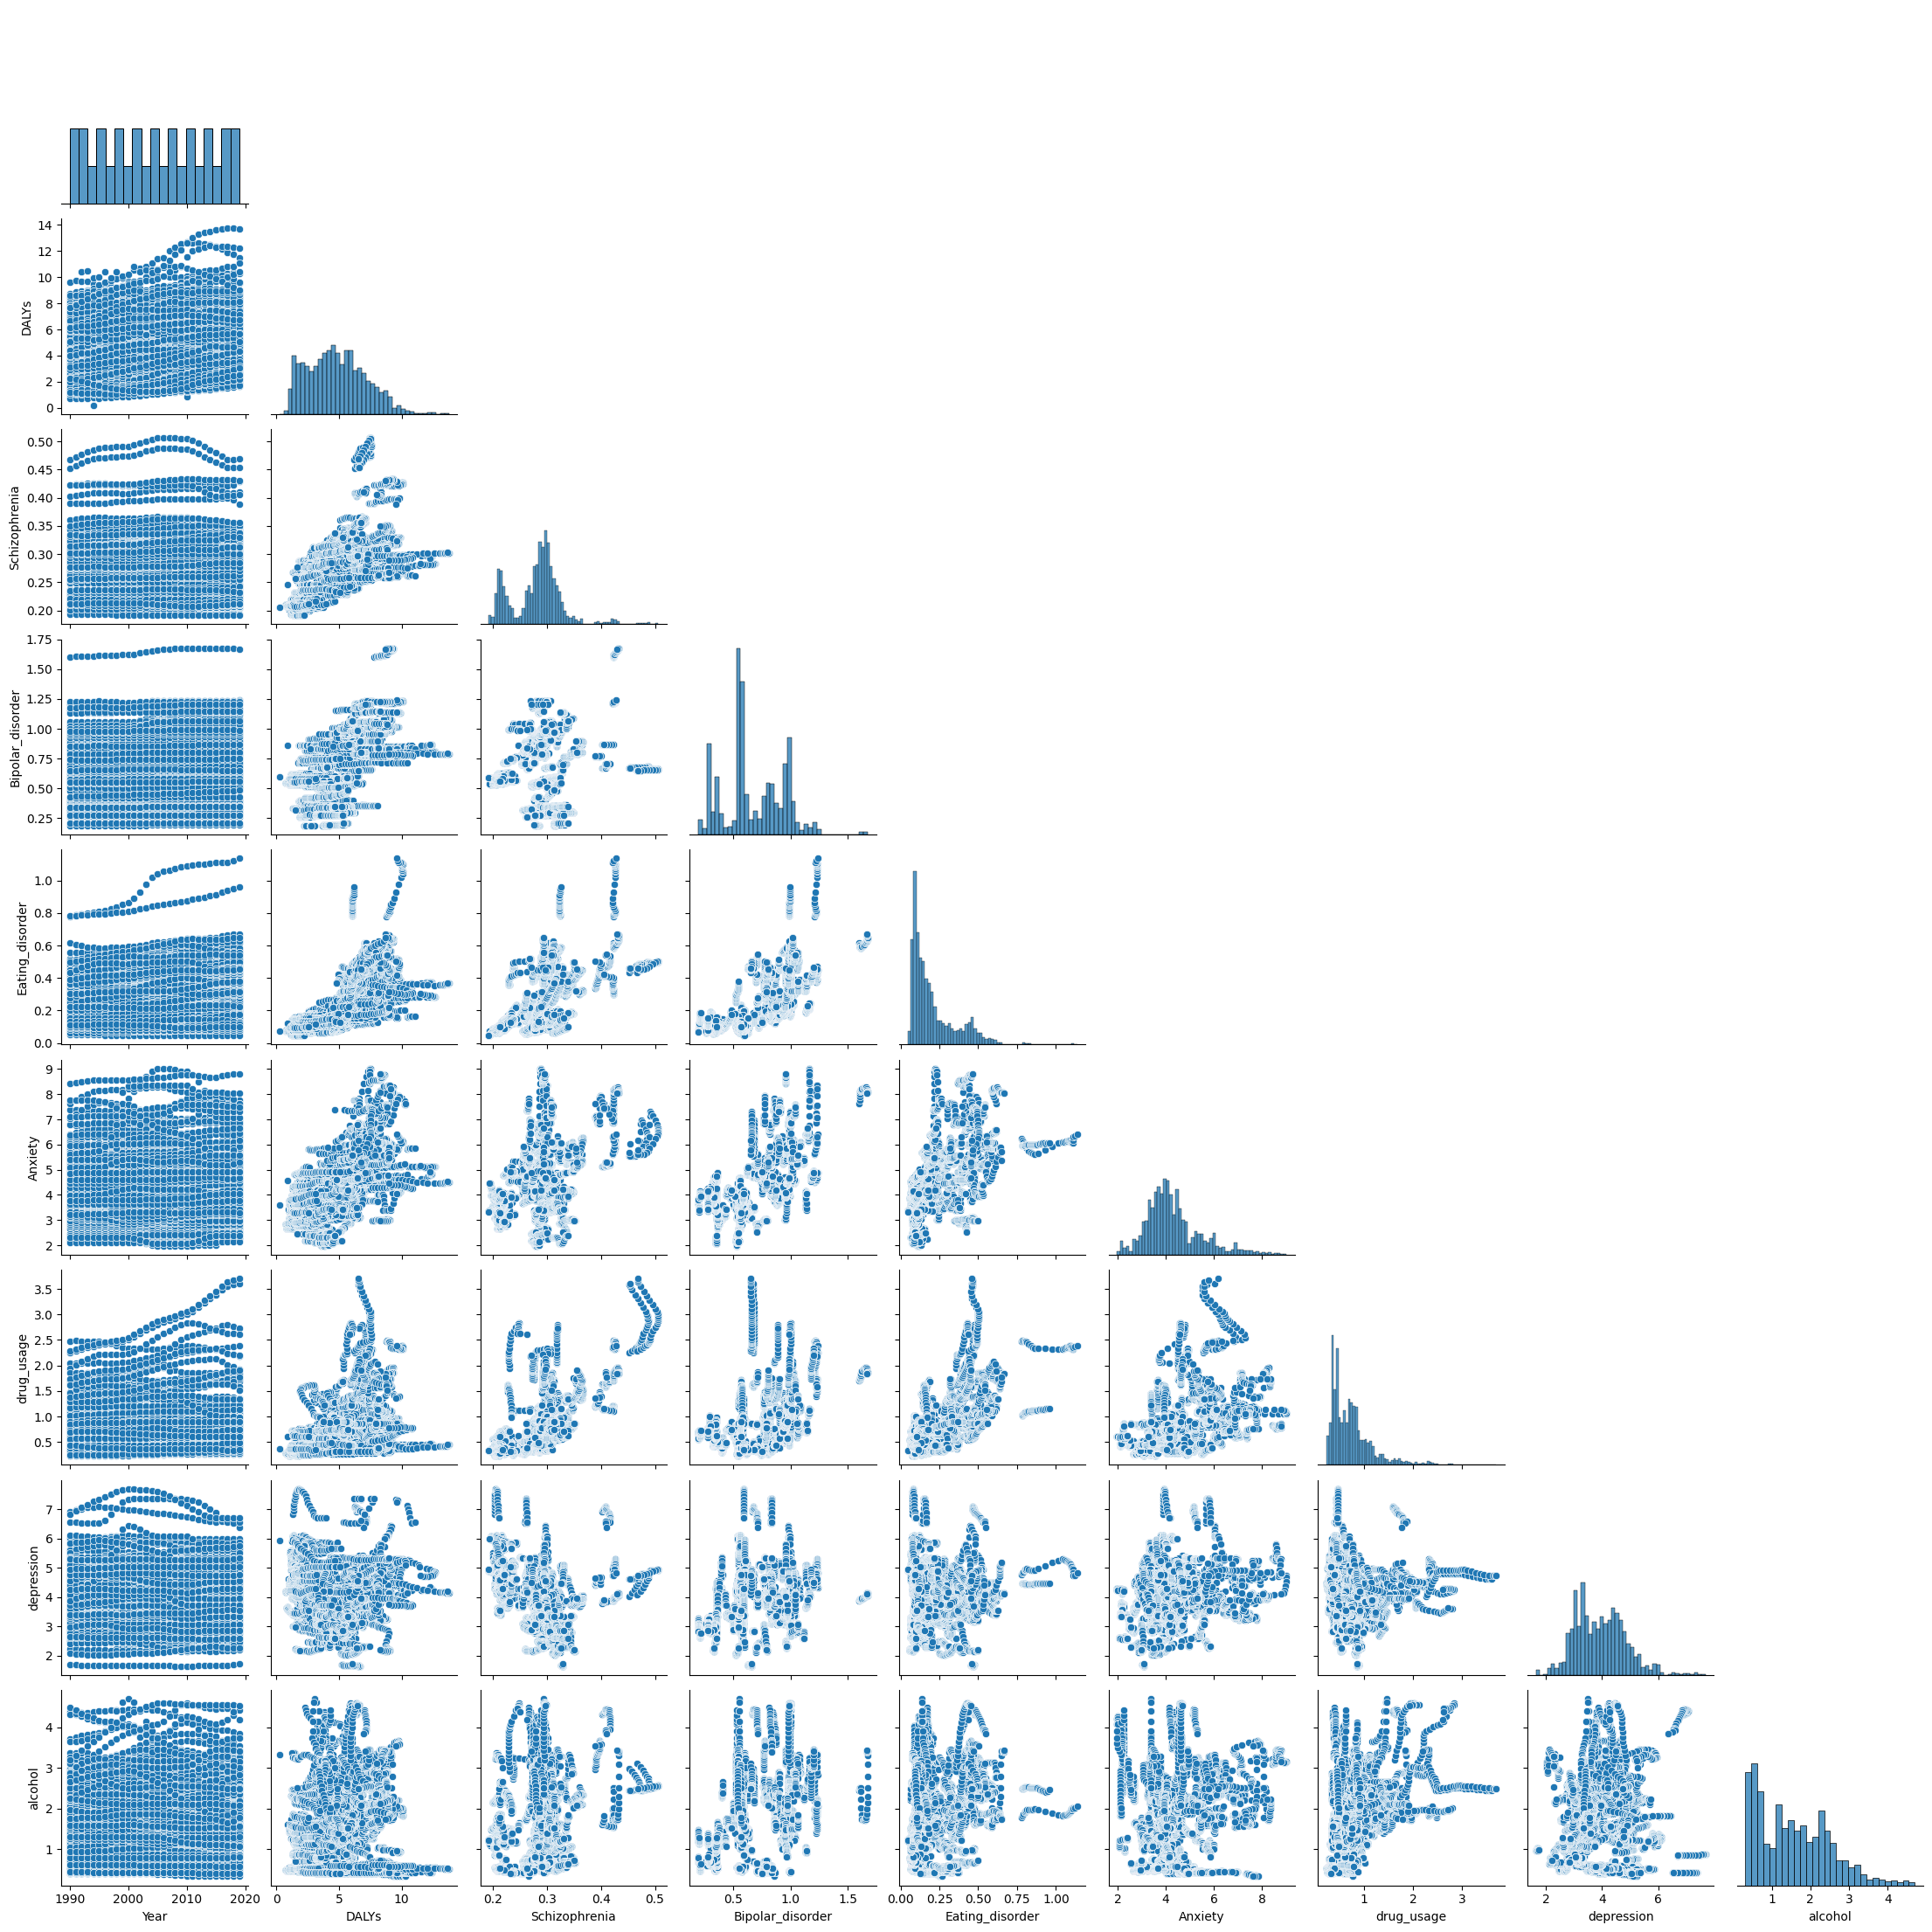

In [36]:
sns.jointplot(x='Schizophrenia', y='DALYs', data=data, kind='reg', color='m')
plt.show()

# Pair plot
sns.pairplot(data, corner=True)
plt.show()

In [39]:
# Year-wise variation in mental fitness in different countries
fig = px.line(data, x="Year", y="DALYs", color='Country', markers=True,
              color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()
df = data.copy()

In [41]:
# Data Encoding (No need to encode 'Country' using LabelEncoder)
# Data Encoding
X = data.drop(['DALYs', 'Country'], axis=1)
y = data['DALYs']']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)


In [43]:
# Perform one-hot encoding for the 'Country' column
data_encoded = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Data Encoding (No need to encode 'Year' as it is already numerical)
X = data_encoded.drop('DALYs', axis=1)
y = data_encoded['DALYs']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

# Applying classification algorithm - Linear Regression
lr = LinearRegression()
lr.fit(xtrain, ytrain)


LinearRegression()

In [44]:
# Model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mean_squared_error(ytrain, ytrain_pred))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.21607553929459866
RMSE is 0.4648392617826066
R2 score is 0.959787723149387




In [45]:
# Model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mean_squared_error(ytest, ytest_pred))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 0.19811136453253617
RMSE is 0.44509702822253955
R2 score is 0.958816271283862




In [46]:
# Applying classification algorithm - Random Forest Regression
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

RandomForestRegressor()

In [48]:
# Model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mean_squared_error(ytrain, ytrain_pred))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.00518325438659334
RMSE is 0.07199482194292406
R2 score is 0.9990353815102752




In [49]:
# Model evaluation for testing set
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mean_squared_error(ytest, ytest_pred))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 0.029784669587329976
RMSE is 0.17258235595601878
R2 score is 0.9938083120315748




In [50]:
# Applying classification algorithm - Decision Tree Regression
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(xtrain, ytrain)

# Predicting the value
ytest_pred = dtr.predict(xtest)


In [53]:
# Evaluating the model
print("Results for Decision Tree Regression:")
print("1) Mean Square Error={}".format(mean_squared_error(ytest, ytest_pred)))
print("2) R-Square Score={}".format(r2_score(ytest, ytest_pred)))
print("\n")

# Applying classification algorithm - SVM Regression
svr = SVR()
svr.fit(xtrain, ytrain)

# Predicting the value
ytest_pred = svr.predict(xtest)

# Evaluating the model
print("Results for SVM Regression:")
print("1) Mean Square Error={}".format(mean_squared_error(ytest, ytest_pred)))
print("2) R-Square Score={}".format(r2_score(ytest, ytest_pred)))
print("\n")

# Conclusion
print("Random Forest Regression works well on both train and test sets with r2 score of 0.99.")
print("Decision Tree Regression also works well on both train and test sets with r2 score of 0.98.")

# Predicting mental fitness for user input
country = input('Enter Your country Name:')
year = int(input("Enter the Year:"))
schi = float(input("Enter your Schizophrenia rate in % (if not enter 0):")) * 100
bipo_dis = float(input("Enter your Bipolar disorder rate in % (if not enter 0):")) * 100
eat_dis = float(input("Enter your Eating disorder rate in % (if not enter 0):")) * 100
anx = float(input("Enter your Anxiety rate in % (if not enter 0):")) * 100
drug_use = float(input("Enter your Drug Usage rate per year in % (if not enter 0):")) * 100
depr = float(input("Enter your Depression rate in % (if not enter 0):")) * 100
alch = float(input("Enter your Alcohol Consuming rate per year in % (if not enter 0):")) * 100

prediction = rf.predict([[year, schi, bipo_dis, eat_dis, anx, drug_use, depr, alch]])
print("Your Mental Fitness is {}%".format(prediction[0]))
print("Bye...!")

Results for Decision Tree Regression:
1) Mean Square Error=4.787084524723388
2) R-Square Score=0.004852695489600878


Results for SVM Regression:
1) Mean Square Error=4.787084524723388
2) R-Square Score=0.004852695489600878


Random Forest Regression works well on both train and test sets with r2 score of 0.99.
Decision Tree Regression also works well on both train and test sets with r2 score of 0.98.


KeyboardInterrupt: ignored

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  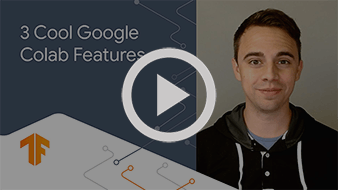
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

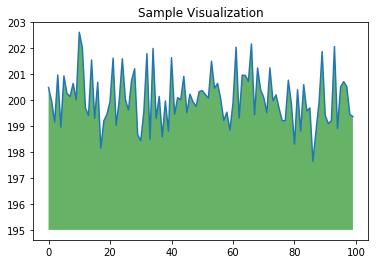

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
